In [2]:
import zipfile

# Nombre del archivo comprimido
zip_file = 'chest-xray-pneumonia.zip'

# Directorio de destino para la descompresión
destination_folder = 'proyecto final'

# Descomprimir el archivo
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

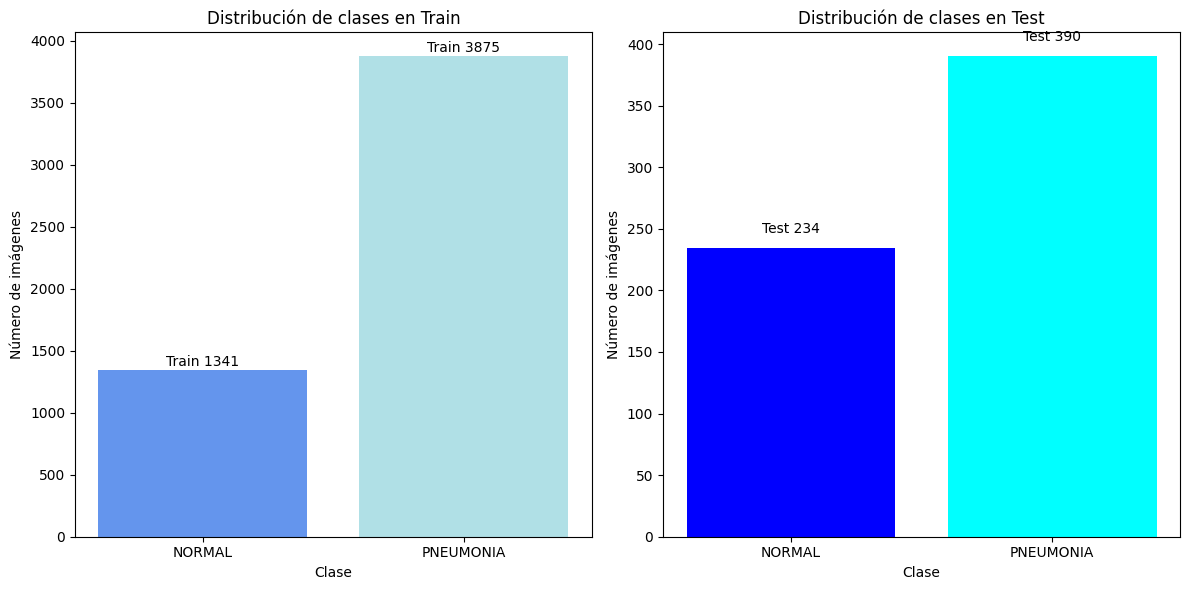

In [3]:
import os
import matplotlib.pyplot as plt

# Rutas para leer los archivos
train_normal_dir = "proyecto_final\\chest_xray\\train\\NORMAL"
train_neumonia_dir = "proyecto_final\\chest_xray\\train\\PNEUMONIA"

test_normal_dir = "proyecto_final\\chest_xray\\test\\NORMAL"
test_neumonia_dir = "proyecto_final\\chest_xray\\test\\PNEUMONIA"

# Contar el número de imágenes en cada clase
num_normal = len(os.listdir(train_normal_dir))
num_neumonia = len(os.listdir(train_neumonia_dir))

test_num_normal = len(os.listdir(test_normal_dir))
test_num_neumonia = len(os.listdir(test_neumonia_dir))

# Etiquetas de las clases
class_labels = ['NORMAL', 'PNEUMONIA']

# Número de imágenes en cada clase
class_counts1 = [num_normal, num_neumonia]
class_counts2 = [test_num_normal, test_num_neumonia]

# Tamaños de las carpetas
folder_sizes_train = [f"Train {num_normal}", f"Train {num_neumonia}"]
folder_sizes_test = [f"Test {test_num_normal}", f"Test {test_num_neumonia}"]

# Colores personalizados para las barras
colors1 = ['cornflowerblue', 'powderblue']
colors2 = ['blue', 'cyan']


# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica 1: Distribución de clases en train
bars1 = ax1.bar(class_labels, class_counts1, color=colors1)
ax1.set_xlabel('Clase')
ax1.set_ylabel('Número de imágenes')
ax1.set_title('Distribución de clases en Train')

# Agregar etiquetas con los tamaños de las carpetas
for bar, label in zip(bars1, folder_sizes_train):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 10, label, ha='center', va='bottom')

# Gráfica 2: Distribución de clases en test
bars2 = ax2.bar(class_labels, class_counts2, color=colors2)
ax2.set_xlabel('Clase')
ax2.set_ylabel('Número de imágenes')
ax2.set_title('Distribución de clases en Test')

# Agregar etiquetas con los tamaños de las carpetas
for bar, label in zip(bars2, folder_sizes_test):
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 10, label, ha='center', va='bottom')

# Ajustar espaciado entre las gráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()


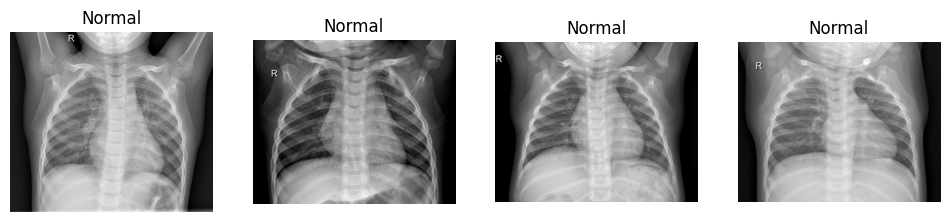

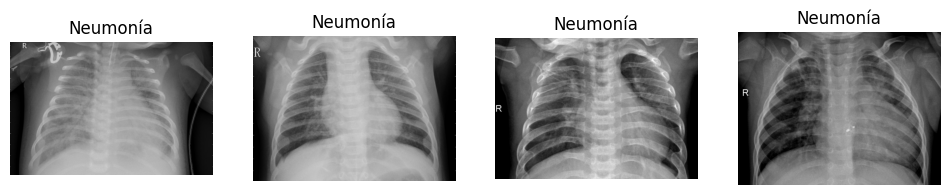

In [4]:
import cv2

normal_images = os.listdir(train_normal_dir)
plt.figure(figsize=(12,8))
for i, img_name in enumerate(normal_images[:4]):
    img_path = os.path.join(train_normal_dir, img_name)
    imagen = cv2.imread(img_path)
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)  # Convertir a RGB
    plt.subplot(2, 4, i+1)
    plt.imshow(imagen_rgb)
    plt.title("Normal")
    plt.axis('off')

pneumonia_images = os.listdir(train_neumonia_dir)
plt.figure(figsize=(12,8))   
for i, img_name in enumerate(pneumonia_images[:4]):  
    img_path = os.path.join(train_neumonia_dir, img_name)
    imagen = cv2.imread(img_path)
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)  # Convertir a RGB
    plt.subplot(2,4, i+5)
    plt.imshow(imagen_rgb)
    plt.title("Neumonía")  
    plt.axis('off')

plt.show()  

In [15]:
import os
import shutil

train_normal_dir = "proyecto_final\\chest_xray\\train\\NORMAL"
train_neumonia_dir = "proyecto_final\\chest_xray\\train\\PNEUMONIA"

normal_filenames = os.listdir(train_normal_dir)
num_normal = len(normal_filenames)
num_neumonia = len(os.listdir(train_neumonia_dir))
duplicate_factor = int(num_neumonia / num_normal)

balanced_train_dir = "proyecto_final\\chest_xray\\train_balanced"
os.makedirs(balanced_train_dir, exist_ok=True)

# Crear subcarpetas para las clases "NORMAL" y "PNEUMONIA"
balanced_normal_dir = os.path.join(balanced_train_dir, "NORMAL")
balanced_neumonia_dir = os.path.join(balanced_train_dir, "PNEUMONIA")
os.makedirs(balanced_normal_dir, exist_ok=True)
os.makedirs(balanced_neumonia_dir, exist_ok=True)

# Duplicar las imágenes en la clase "NORMAL" y copiar las imágenes de la clase "PNEUMONIA"
for _ in range(duplicate_factor):
    for filename in normal_filenames:
        src_path = os.path.join(train_normal_dir, filename)
        dest_path = os.path.join(balanced_normal_dir, filename)
        shutil.copyfile(src_path, dest_path)

for filename in os.listdir(train_neumonia_dir):
    src_path = os.path.join(train_neumonia_dir, filename)
    dest_path = os.path.join(balanced_neumonia_dir, filename)
    shutil.copyfile(src_path, dest_path)

# Mostrar el número de imágenes en el nuevo conjunto de entrenamiento equilibrado
num_normal_balanced = num_normal * duplicate_factor
num_neumonia_balanced = num_neumonia
print("Número de imágenes en la clase NORMAL (equilibrado):", num_normal_balanced)
print("Número de imágenes en la clase PNEUMONIA (equilibrado):", num_neumonia_balanced)


Número de imágenes en la clase NORMAL (equilibrado): 2682
Número de imágenes en la clase PNEUMONIA (equilibrado): 3875


In [40]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rutas para leer los archivos
train_dir = "proyecto_final\\chest_xray\\train_balanced"
validation_dir = "proyecto_final\\chest_xray\\val"
test_dir = "proyecto_final\\chest_xray\\test"

# Dimensiones de las imágenes
image_height = 224
image_width = 224
batch_size = 32

# Preprocesamiento de imágenes
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalización de píxeles a valores entre 0 y 1
    horizontal_flip=True  
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Generadores de datos
train_data_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',  
)

validation_data_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',  
    shuffle=False
)

test_data_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary' 
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [19]:
import numpy as np
from sklearn.decomposition import PCA
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

In [20]:
#contrucción del modelo


from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

In [21]:
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
# Entrenando el modelo usando los generadores de entrenamiento y validación
historico = model.fit(train_data_generator, epochs=10, validation_data=validation_data_generator)

Epoch 1/10
163/163 [==============================] - 312s 2s/step - loss: 0.3390 - accuracy: 0.8487 - val_loss: 0.4162 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 305s 2s/step - loss: 0.1288 - accuracy: 0.9496 - val_loss: 0.6157 - val_accuracy: 0.7500
Epoch 3/10
163/163 [==============================] - 305s 2s/step - loss: 0.1056 - accuracy: 0.9594 - val_loss: 0.5031 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 305s 2s/step - loss: 0.0852 - accuracy: 0.9659 - val_loss: 0.2486 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 322s 2s/step - loss: 0.0772 - accuracy: 0.9714 - val_loss: 0.5231 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 317s 2s/step - loss: 0.0773 - accuracy: 0.9688 - val_loss: 0.2201 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 306s 2s/step - loss: 0.0688 - accuracy: 0.9753 - val_loss: 0.3327 - val_accuracy: 0.8750

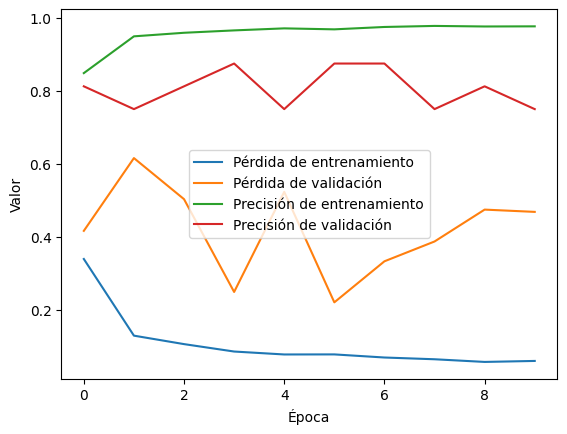

In [25]:
# Graficar la evolución de la pérdida y la precisión del entrenamiento
plt.plot(historico.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historico.history['val_loss'], label='Pérdida de validación')
plt.plot(historico.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(historico.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [37]:

# Evaluando el modelo en el conjunto de prueba
perdida, accuracy = model.evaluate(test_generator)

# Imprimiendo la pérdida y precisión del modelo en el conjunto de prueba
print(perdida, accuracy)

20/20 [==============================] - 12s 569ms/step - loss: 1.6127 - accuracy: 0.7083
1.6126713752746582 0.7083333134651184


In [42]:
val_base_dir = "proyecto_final\\chest_xray\\test"
class_names = ["NORMAL", "PNEUMONIA"]

true_labels = []
predicted_labels = []

for class_name in class_names:
    class_dir = os.path.join(val_base_dir, class_name)
    val_image_names = os.listdir(class_dir)
    
    for img_name in val_image_names:
        img_path = os.path.join(class_dir, img_name)
        image = cv2.imread(img_path)
        if image is None:
            print(f"Failed to load image: {img_path}")
            continue
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        image = np.expand_dims(image, axis=0)
        
        prediction = model.predict(image)
        predicted_class = class_names[int(prediction[0][0] > 0.5)]  # Convierte valor a 0 o 1 usando un umbral de 0.5
        true_class = class_name
        
        true_labels.append(true_class)
        predicted_labels.append(predicted_class)

1/1 [==============================] - 0s 51ms/step


In [43]:
#reporte de clasificación
from sklearn.metrics import classification_report, confusion_matrix

class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Reporte de Clasificación:\n", class_report)

Reporte de Clasificación:
               precision    recall  f1-score   support

      NORMAL       0.98      0.24      0.39       234
   PNEUMONIA       0.69      1.00      0.81       390

    accuracy                           0.71       624
   macro avg       0.84      0.62      0.60       624
weighted avg       0.80      0.71      0.66       624



In [44]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=class_names)
print("Matriz de Confusión:\n", conf_matrix)

Matriz de Confusión:
 [[ 57 177]
 [  1 389]]


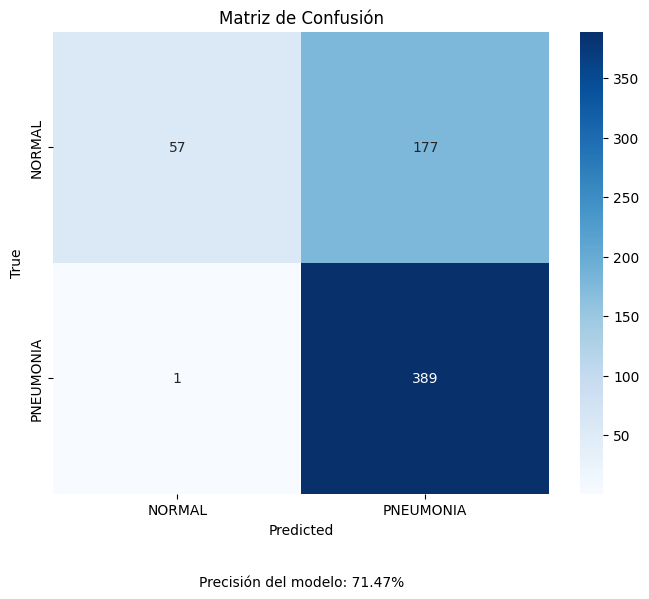

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Generar la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=class_names)

# Calcular la precisión
accuracy = accuracy_score(true_labels, predicted_labels)
accuracy_percent = accuracy * 100

# Crear una figura y un eje para la gráfica de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("True")

# Mostrar la precisión en la gráfica
plt.text(0.5, -0.2, f"Precisión del modelo: {accuracy_percent:.2f}%", ha="center", transform=plt.gca().transAxes)

plt.show()

In [41]:
# Obtener las etiquetas verdaderas del conjunto de prueba
true_labels = test_generator.classes

# Obtener las predicciones del modelo para el conjunto de prueba
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Generar informe de clasificación
class_names = ["NORMAL", "PNEUMONIA"]
classification_rep = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", classification_rep)

20/20 [==============================] - 12s 562ms/step
Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.38      1.00      0.55       234
   PNEUMONIA       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624



c:\Users\Barfsianos\Desktop\CLASE\proyecto final\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Barfsianos\Desktop\CLASE\proyecto final\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Barfsianos\Desktop\CLASE\proyecto final\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [36]:
# Generar matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[234   0]
 [390   0]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rutas para los directorios de clases
train_normal_dir = "proyecto_final\\chest_xray\\train\\NORMAL"
train_neumonia_dir = "proyecto_final\\chest_xray\\train\\PNEUMONIA"

# Parámetros
batch_size = 32
input_shape = (224, 224)  # Tamaño de entrada de la imagen

# Generadores de datos
'''data_generator = ImageDataGenerator(rescale=1.0/255)  # Normalización'''
data_generator = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Crear generadores de datos
train_generator = data_generator.flow_from_directory(
    "proyecto_final\\chest_xray\\train",
    target_size=input_shape,
    batch_size=batch_size,
    class_mode="binary"  # Se asume que estás usando un modelo binario
)

# Calcular pesos de clase inversamente proporcionales a su frecuencia
total_samples = train_generator.samples
class_weights = {0: total_samples / (2 * len(os.listdir(train_normal_dir))),
                 1: total_samples / (2 * len(os.listdir(train_neumonia_dir)))}
'''
                 
class_weights = {0: 0.7,  # asignando más peso a la clase "NORMAL"
                        1: 0.3}  # y menos peso a la clase "PNEUMONIA"

'''

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

# Crear el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compilar el modelo
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Entrenar el modelo 
history = model.fit(train_generator, epochs=10, class_weight=class_weights)

In [ ]:
# Gráfico de pérdida
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='purple')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# imágenes de prueba
test_data_generator = ImageDataGenerator(rescale=1.0/255)
test_generator = test_data_generator.flow_from_directory(
    "proyecto_final\\chest_xray\\test",
    target_size=input_shape,
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False 
)

In [ ]:
val_base_dir = "proyecto_final\\chest_xray\\test"
class_names = ["NORMAL", "PNEUMONIA"]

true_labels = []
predicted_labels = []

for class_name in class_names:
    class_dir = os.path.join(val_base_dir, class_name)
    val_image_names = os.listdir(class_dir)
    
    for img_name in val_image_names:
        img_path = os.path.join(class_dir, img_name)
        image = cv2.imread(img_path)
        if image is None:
            print(f"Failed to load image: {img_path}")
            continue
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        image = np.expand_dims(image, axis=0)
        
        prediction = model.predict(image)
        predicted_class = class_names[int(prediction[0][0] > 0.5)]  # Convierte valor a 0 o 1 usando un umbral de 0.5
        true_class = class_name
        
        true_labels.append(true_class)
        predicted_labels.append(predicted_class)

In [ ]:
test_images_dir = "proyecto_final\\chest_xray\\test\\PNEUMONIA"
test_image_names = os.listdir(test_images_dir)

plt.figure(figsize=(12, 8))

for i, img_name in enumerate(test_image_names[:6]):
    img_path = os.path.join(test_images_dir, img_name)
    image = cv2.imread(img_path)
    if image is None:
        print(f"Failed to load image: {img_path}")
        continue
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image)
    predicted_class = "Normal" if prediction[0][0] < 0.5 else "Neumonía"
    prediction_prob = prediction[0][0]
    
    plt.subplot(2, 3, i + 1)
    plt.imshow(image[0])
    plt.title(f"Etiqueta: Neumonía\nPredicción: {predicted_class}\nProbabilidad: {prediction_prob:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
test_images_dir = "proyecto_final\\chest_xray\\test\\NORMAL"
test_image_names = os.listdir(test_images_dir)

plt.figure(figsize=(12, 8))

for i, img_name in enumerate(test_image_names[:6]):
    img_path = os.path.join(test_images_dir, img_name)
    image = cv2.imread(img_path)
    if image is None:
        print(f"Failed to load image: {img_path}")
        continue
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image)
    predicted_class = "Normal" if prediction[0][0] < 0.5 else "Neumonía"
    prediction_prob = prediction[0][0]
    
    plt.subplot(2, 3, i + 1)
    plt.imshow(image[0])
    plt.title(f"Etiqueta: Normal\nPredicción: {predicted_class}\nProbabilidad: {prediction_prob:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#reporte de clasificación
from sklearn.metrics import classification_report, confusion_matrix

class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Reporte de Clasificación:\n", class_report)

In [ ]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=class_names)
print("Matriz de Confusión:\n", conf_matrix)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Generar la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=class_names)

# Calcular la precisión
accuracy = accuracy_score(true_labels, predicted_labels)
accuracy_percent = accuracy * 100

# Crear una figura y un eje para la gráfica de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("True")

# Mostrar la precisión en la gráfica
plt.text(0.5, -0.2, f"Precisión del modelo: {accuracy_percent:.2f}%", ha="center", transform=plt.gca().transAxes)

plt.show()


In [ ]:
# Mostrar el informe de clasificación
classification_rep = classification_report(test_true_labels, test_predicted_labels, target_names=test_generator.class_indices.keys())
print(classification_rep)

In [ ]:
# Calcular la precisión global
accuracy = np.sum(test_true_labels == test_predicted_labels) / len(test_true_labels)
print("Accuracy:", accuracy)